In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df=pd.read_csv('/content/house_price_regression_dataset.csv')

In [ ]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
X=df.drop(columns='House_Price')
y=df['House_Price']

In [ ]:
X

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [ ]:
y

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06
...,...
995,7.014940e+05
996,6.837232e+05
997,5.720240e+05
998,9.648653e+05


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create separate scalers for X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform X (features)
X_scaled = scaler_X.fit_transform(X)

# For y (target), reshape to 2D if needed
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
X.shape

(1000, 7)

In [ ]:
model=Sequential([
    Dense(64,input_shape=(X_train.shape[1],),activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='linear')
])

In [ ]:
from tensorflow.keras.losses import Huber
model.compile(
    optimizer='adam',
    loss=Huber(delta=1.0),
    metrics=['mae']
)


In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [ ]:
history=model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.1200e-04 - mae: 0.0329 - val_loss: 0.0020 - val_mae: 0.0511
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3613e-04 - mae: 0.0307 - val_loss: 0.0018 - val_mae: 0.0489
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6751e-04 - mae: 0.0285 - val_loss: 0.0018 - val_mae: 0.0484
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5820e-04 - mae: 0.0266 - val_loss: 0.0017 - val_mae: 0.0472
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8410e-04 - mae: 0.0264 - val_loss: 0.0018 - val_mae: 0.0494
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.4549e-04 - mae: 0.0260 - val_loss: 0.0017 - val_mae: 0.0471
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9645e-04 - mae: 0.0267 - val_loss: 0.0018 - val_mae: 0.0487
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7629e-04 - mae: 0.0290 - val_loss: 0.0018 - val_mae: 0.0498
Epoch 9/100
20/20 ━━━━━━━━

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print("Test MAE:", mae)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mae: 0.0483 
Test MAE: 0.046913113445043564


In [ ]:
loss_train, acc_train = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", acc_train)


Training Accuracy: 0.019057972356677055


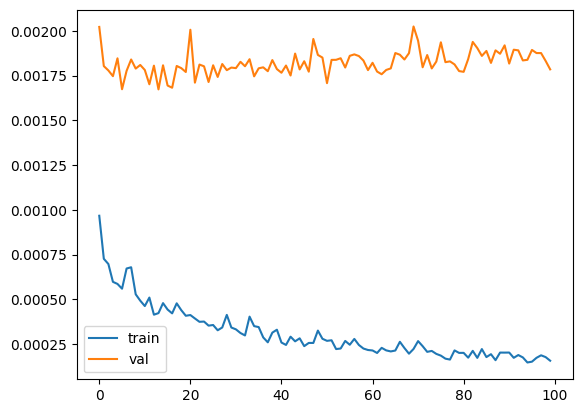

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
